# Calculate effects on existing system from additional nodes

Create a latitude / longitude grid.  Create list of stations.  Iterate over entire grid and calculate if any stations are within range, and if so what is closest station.  Repeat with potential new station to determine changes to coverage area and grid cells supplied by each area.

10000  total locations dimensions  100  by  100
Latitude  38.907  to  38.933
Longitude  -77.059  to  -77.03
Square miles covered  2.7971202178658245
Average grid size  0.00027971202178658246
3975  grid cells have no service.  Square miles =  1.1118552866016653
Station #  31113  at  38.920669 -77.04368
Grid cells  146  or square miles  0.04083795518084104
Station #  31104  at  38.922925 -77.042581
Grid cells  530  or square miles  0.14824737154688872
Station #  31296  at  38.924088 -77.040787
Grid cells  1477  or square miles  0.4131346561787823
Station #  31114  at  38.918808 -77.041571
Grid cells  171  or square miles  0.0478307557255056
Station #  31116  at  38.917761 -77.04062
Grid cells  986  or square miles  0.2757960534815703
Station #  31110  at  38.9154 -77.0446
Grid cells  1214  or square miles  0.33957039444891113
Station #  10000  at  38.918498 -77.04848
Grid cells  1345  or square miles  0.3762126693029534
Station #  20000  at  38.919634 -77.044747
Grid cells  156  or squar

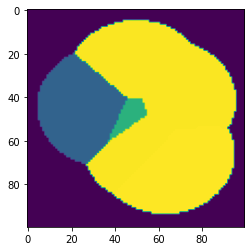

In [34]:
# from internet
from math import radians, cos, sin, asin, sqrt
def haversine(lon1, lat1, lon2, lat2):
    # convert decimal degrees to radians
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    #r = 6371 # radius of earth in kilometers
    r = 3956 # radius earth use for miles
    return c * r

class LocationType:
    def __init__(self, lat, long):
        self.lat = lat
        self.long = long
    
    def getLat(self):
        return self.lat
    
    def getLong(self):
        return self.long

    def setLat(self,lat):
        self.lat = lat
    
    def setLong(self,long):
        self.long = long
        
class StationType:
    def __init__(self,lat,long,num):
        self.lat = lat
        self.long = long
        self.id = num
    
    def getLat(self):
        return self.lat
    
    def getLong(self):
        return self.long
    
    def getId(self):
        return self.id
    
import numpy as np
import matplotlib.pyplot as plt

# get lat/long box, divide into xDim x yDim sub-boxes, calculate lat/long for each sub-box
# Lat/Long in decimal format, not D/M/S
# lat/long from Google Earth guestimate
maxLat = 38.927
maxLong = -77.030
minLat = 38.910
minLong = -77.056
# fine tuned lat/long
minLat = 38.907
maxLat = 38.933
minLong = -77.059
#minLong = -78.0
#maxLat = 39.0
#maxLong = -77.0
#minLat = 38.0
latDiff = maxLat - minLat
longDiff = maxLong - minLong
xDim = 100
yDim = 100
latStep = latDiff / xDim
longStep = longDiff / yDim
print(xDim * yDim," total locations dimensions ", xDim, " by ", yDim)
print("Latitude ", minLat, " to ", maxLat)
print("Longitude ", minLong, " to ", maxLong)
squareMiles = haversine(minLong, minLat, maxLong, minLat) * haversine(minLong, minLat, minLong, maxLat)
print("Square miles covered ",squareMiles)
gridCellArea = squareMiles / (xDim * yDim)
print("Average grid size ", gridCellArea)
locationMatrix =  np.zeros( (xDim,yDim), dtype=LocationType )

for i in range(xDim):
    for j in range(yDim):
        #locationMatrix[i,j].setLat(minLat + i * latStep)
        #locationMatrix[i,j].setLong(minLong + i * latLong)
        loc = LocationType(minLat + float(i) * latStep, minLong + float(j) * longStep)
        locationMatrix[i,j] = loc
maxDistance = 0.5
nearestMatrix = np.zeros((xDim,yDim),dtype=np.int16)
stationList = [(38.920669,-77.043680,31113),
               (38.922925,-77.042581,31104),
              (38.924088,-77.040787,31296),
             (38.918808,-77.041571,31114),
               (38.917761,-77.040620,31116),
               (38.915400,-77.044600,31110)]

# add proposed stations
# use station ids 10K-20K for good contrast in image
# CT & Kalorama
proposed1 = (38.918498,-77.04848,10000) 
stationList.append(proposed1)
# Kalorama Park
proposed2 = (38.919634,-77.044747,20000)
stationList.append(proposed2)

# determine closest station for every entry in matrix
for i in range(xDim):
    for j in range(yDim):
        nearestMatrix[i,j] = 0 # assume no one on range
        minDistance = maxDistance
        loc = locationMatrix[i,j]
        lat = loc.getLat()
        long = loc.getLong()
        for k in range(len(stationList)):
            station = stationList[k]
            stationLat = station[0]
            stationLong = station[1]
            stationId = station[2]
            distance = haversine(stationLong, stationLat, long, lat)
            if distance < minDistance:
                nearestMatrix[i,j] = stationId
                minDistance = distance

# count locations without service (distance > max)
counter = 0
for i in range(xDim):
    for j in range(yDim):
        if nearestMatrix[i,j] == 0:
            counter = counter + 1
print(counter, " grid cells have no service.  Square miles = ", counter * gridCellArea)
    
# count occurances for each station
for i in range(len(stationList)):
    currentStation = stationList[i]
    stationId = currentStation[2]
    print("Station # ", stationId, " at ", currentStation[0], currentStation[1])
    counter = 0
    for j in nearestMatrix.flat:
        if stationId == j:
            counter = counter + 1
    print("Grid cells ",counter," or square miles ",counter * gridCellArea)


plt.imshow(nearestMatrix)

In [6]:
# from internet
from math import radians, cos, sin, asin, sqrt
def haversine(lon1, lat1, lon2, lat2):
    # convert decimal degrees to radians
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    #r = 6371 # radius of earth in kilometers
    r = 3956 # radius earth use for miles
    return c * r
    
stationList = [(38.920669,-77.043680,31113),
               (38.922925,-77.042581,31104),
              (38.924088,-77.040787,31296),
             (38.918808,-77.041571,31114),
               (38.917761,-77.040620,31116),
               (38.915400,-77.044600,31110)]
proposed1 = (38.918498,-77.04848,10000) 
stationList.append(proposed1)
for i in range(len(stationList)):
    start = stationList[i]
    print("Start Station ",start[2])
    for j in range(len(stationList)):
        end = stationList[j]
        distance = haversine(start[1], start[0], end[1], end[0])
        print("End Station ",end[2]," distance ", distance)

Start Station  31113
End Station  31113  distance  0.0
End Station  31104  distance  0.16657804882139
End Station  31296  distance  0.28262553005344004
End Station  31114  distance  0.17130644208118234
End Station  31116  distance  0.2594904286821863
End Station  31110  distance  0.3671410187033171
End Station  10000  distance  0.29825623250303795
Start Station  31104
End Station  31113  distance  0.16657804882139
End Station  31104  distance  0.0
End Station  31296  distance  0.12543759736837612
End Station  31114  distance  0.2893906227922993
End Station  31116  distance  0.37178561068473576
End Station  31110  distance  0.5307651157878226
End Station  10000  distance  0.4402790205504729
Start Station  31296
End Station  31113  distance  0.28262553005344004
End Station  31104  distance  0.12543759736837612
End Station  31296  distance  0.0
End Station  31114  distance  0.36698332291617497
End Station  31116  distance  0.4369412415745245
End Station  31110  distance  0.633871845573187